# Perturbation domain size comparisons

**Note: these analyses were made using simulations for which TSK was ~2.6 K less than SST.**

In [1]:
import modules.wrf_perturbation as wp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import datetime
import xarray

print("Report last updated at " + str(datetime.datetime.utcnow()) + ' UTC.')

Report last updated at 2020-12-09 07:12:23.781070 UTC.


<h1>Table of contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Settings" data-toc-modified-id="Settings-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Settings</a></span></li><li><span><a href="#Read-data" data-toc-modified-id="Read-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read data</a></span></li><li><span><a href="#RCE-and-averaging-times" data-toc-modified-id="RCE-and-averaging-times-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>RCE and averaging times</a></span></li><li><span><a href="#Mean-profiles-by-domain-size" data-toc-modified-id="Mean-profiles-by-domain-size-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Mean profiles by domain size</a></span></li><li><span><a href="#Comparisons-of-perturbations" data-toc-modified-id="Comparisons-of-perturbations-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Comparisons of perturbations</a></span></li><li><span><a href="#Differences-between-perturbation-responses" data-toc-modified-id="Differences-between-perturbation-responses-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Differences between perturbation responses</a></span></li><li><span><a href="#Densities-of-precipitable-water-by-domain-size" data-toc-modified-id="Densities-of-precipitable-water-by-domain-size-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Densities of precipitable water by domain size</a></span></li><li><span><a href="#Calculation-of-LES-profiles-based-on-20-km-domain,-1-km-resolution-RCE-profiles" data-toc-modified-id="Calculation-of-LES-profiles-based-on-20-km-domain,-1-km-resolution-RCE-profiles-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Calculation of LES profiles based on 20 km domain, 1 km resolution RCE profiles</a></span></li></ul></div>

## Settings

In [3]:
# Input directories with dataset names as keys.
basedir = '/g/data/up6/tr2908/em_quarter_ss/v4.1.4/original_1km/output/'
inputs = {'100 km RCE':    basedir+'100km@1km/RCE',
          '100 km pert T': basedir+'100km@1km/perturb_T',
          '100 km pert q': basedir+'100km@1km/perturb_q',
          '50 km RCE':     basedir+'50km@1km/RCE/',
          '50 km pert T':  basedir+'50km@1km/perturb_T/',
          '50 km pert q':  basedir+'50km@1km/perturb_q/',
          '20 km RCE':     basedir+'20km@1km/RCE/',
          '20 km pert T':  basedir+'20km@1km/perturb_T_large/',
          '20 km pert q':  basedir+'20km@1km/perturb_q_large/',
          '15 km RCE':     basedir+'15km@1km/RCE/',
          '15 km pert T':  basedir+'15km@1km/perturb_T/',
          '15 km pert q':  basedir+'15km@1km/perturb_q/',
          '10 km RCE':     basedir+'10km@1km/RCE/',
          '10 km pert T':  basedir+'10km@1km/perturb_T/',
          '10 km pert q':  basedir+'10km@1km/perturb_q/',}

# Figure settings.
plt.rcParams['figure.figsize'] = wp.FIGURE_SIZE               # Figure size for non-facetted plots.
plt.rcParams['font.size'] = 14                                # Font size for plots.
plt.rcParams['axes.formatter.useoffset'] = False              # Don't use offsets in plots.
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"} # Don't make figure backgrounds transparent.

# Analysis settings. 
rce_start = wp.as_date('2000-03-25')             # Defined RCE period to compare (start).
rce_end   = wp.as_date('2000-04-01')             # Defined RCE period to compare (end).
plot_levels = [850, 500, 350, 100]               # Pressure levels to plot individually [hPa].

## Read data

In [19]:
wrfvars = wp.read_wrfvars(inputs=inputs, drop_vars=['eta_T'])

## RCE and averaging times

Mean precipitable water is plotted by time to show when the models reach RCE. RCE is reached when there is little change in precipitable water. The seven day averaging time for the RCE period is shown in green.

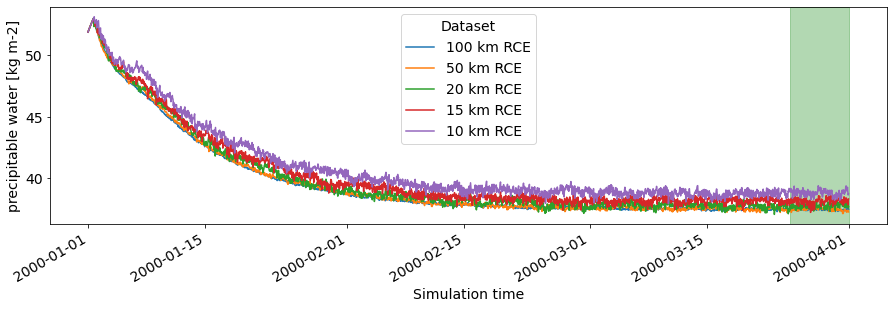

In [20]:
wrfvars.sel(Dataset=['100 km RCE', '50 km RCE', '20 km RCE', '15 km RCE', '10 km RCE']).pw.plot(hue='Dataset')
plt.axvspan(xmin=rce_start, xmax=rce_end, alpha=0.3, color='green')
plt.show()

To help test whether the RCE period is actually at RCE, here are statistics on precipitable water per dataset:

In [7]:
wp.dat_properties(dat=wrfvars, variables=['pw'], start=rce_start, end=rce_end,
                  datasets=['100 km RCE', '50 km RCE', '20 km RCE', '15 km RCE', '10 km RCE'])

Precipitable water [kg m-2] from 2000-03-25 00:00:00 to 2000-04-01 00:00:00:
Dataset                   min     max     mean    sd     
100 km RCE                37.3    37.57   37.45   0.06   


KeyError: '50 km RCE'

For comparison and to ensure that the control runs were at RCE before the perturbation runs were started, here are the same statistics for the control (RCE) runs just before the perturbations were started:

In [ ]:
wp.dat_properties(dat=wrfvars, variables=['pw'], start=wp.as_date('2000-02-23'), end=wp.as_date('2000-02-29'), 
                  datasets=['100 km RCE', '50 km RCE', '20 km RCE', '15 km RCE', '10 km RCE'])

The following plot shows differences between consecutive hourly values of rolling mean precipitable water with a window size of 5 days, for the RCE runs. The red line is zero difference. When differences are around zero, RCE is reached.

In [ ]:
pw = wrfvars.sel(Dataset=['100 km RCE', '50 km RCE', '20 km RCE', '15 km RCE', '10 km RCE']).pw
pw = pw.chunk({'time': None})
pw.dropna('time').rolling(time=24*5, center=False).mean().diff('time').plot(hue='Dataset')
plt.axvspan(xmin=rce_start, xmax=rce_end, alpha=0.3, color='green')
plt.axhline(0, color='red')
plt.show()
del(pw)

The following plot shows the same differences, but for the temperature perturbation runs:

In [ ]:
pw = wrfvars.sel(Dataset=['100 km pert T', '50 km pert T', '20 km pert T', '15 km pert T', '10 km pert T']).pw
pw = pw.chunk({'time': None})
pw.dropna('time').rolling(time=24*5, center=False).mean().diff('time').plot(hue='Dataset')
plt.axvspan(xmin=rce_start, xmax=rce_end, alpha=0.3, color='green')
plt.axhline(0, color='red')
plt.show()

The following plot shows the same differences, but for the moisture perturbation runs:

In [ ]:
pw = wrfvars.sel(Dataset=['100 km pert q', '50 km pert q', '20 km pert q', '15 km pert q', '10 km pert q']).pw
pw = pw.chunk({'time': None})
pw.dropna('time').rolling(time=24*5, center=False).mean().diff('time').plot(hue='Dataset')
plt.axvspan(xmin=rce_start, xmax=rce_end, alpha=0.3, color='green')
plt.axhline(0, color='red')
plt.show()

## Mean profiles by domain size

Here are mean profiles for all the RCE runs over the RCE averaging period.

In [ ]:
wp.plot_mean_profiles(dat=wrfvars.sel(Dataset=['100 km RCE', '50 km RCE', '20 km RCE', '15 km RCE', '10 km RCE']),
                      start=rce_start, end=rce_end, figsize=[13,5], title='RCE mean profiles by domain size')

Here are profiles for the temperature perturbation runs at RCE:

In [ ]:
wp.plot_mean_profiles(dat=wrfvars.sel(Dataset=['100 km pert T', '50 km pert T', '20 km pert T', 
                                               '15 km pert T', '10 km pert T']),
                      start=rce_start, end=rce_end, figsize=[13,5], title='Pert T mean profiles by domain size')

Here are profiles for the moisture perturbation runs at RCE:

In [ ]:
wp.plot_mean_profiles(dat=wrfvars.sel(Dataset=['100 km pert q', '50 km pert q', '20 km pert q', 
                                               '15 km pert q', '10 km pert q']),
                      start=rce_start, end=rce_end, figsize=[13,5], title='Pert q mean profiles by domain size')

## Comparisons of perturbations

Here are the effects of T perturbation by domain size:

In [ ]:
wp.plot_pairwise_diffs(dat=wrfvars, start=rce_start, end=rce_end, variables=['tk', 'q', 'rh'], figsize=(12,5),
                       comp_pairs={'100 km': ('100 km RCE', '100 km pert T'), 
                                   '50 km':  ('50 km RCE',  '50 km pert T'),
                                   '20 km':  ('20 km RCE',  '20 km pert T'), 
                                   '15 km':  ('15 km RCE',  '15 km pert T'),
                                   '10 km':  ('10 km RCE',  '10 km pert T')}, 
                       title='T perturbations by domain size')

And effects of q perturbations by domain size:

In [ ]:
wp.plot_pairwise_diffs(dat=wrfvars, start=rce_start, end=rce_end, variables=['tk', 'q', 'rh'], figsize=(12,5),
                       comp_pairs={'100 km': ('100 km RCE', '100 km pert q'), 
                                   '50 km':  ('50 km RCE',  '50 km pert q'),
                                   '20 km':  ('20 km RCE',  '20 km pert q'), 
                                   '15 km':  ('15 km RCE',  '15 km pert q'),
                                   '10 km':  ('10 km RCE',  '10 km pert q')}, 
                       title='q perturbations by domain size')

## Differences between perturbation responses

Here are the differences in perturation responses by domain size, for temperature perturbations:

In [ ]:
rce_100 = wrfvars.sel(time=slice(rce_start, rce_end), Dataset='100 km RCE').mean('time')
rce_50 = wrfvars.sel(time=slice(rce_start, rce_end), Dataset='50 km RCE').mean('time')
rce_20 = wrfvars.sel(time=slice(rce_start, rce_end), Dataset='20 km RCE').mean('time')
rce_15 = wrfvars.sel(time=slice(rce_start, rce_end), Dataset='15 km RCE').mean('time')
rce_10 = wrfvars.sel(time=slice(rce_start, rce_end), Dataset='10 km RCE').mean('time')

with xarray.set_options(keep_attrs=True):
    diffs_100 = wrfvars.sel(Dataset=['100 km RCE', '100 km pert T', '100 km pert q']) - rce_100
    diffs_50 = wrfvars.sel(Dataset=['50 km RCE', '50 km pert T', '50 km pert q']) - rce_50
    diffs_20 = wrfvars.sel(Dataset=['20 km RCE', '20 km pert T', '20 km pert q']) - rce_20
    diffs_15 = wrfvars.sel(Dataset=['15 km RCE', '15 km pert T', '15 km pert q']) - rce_15
    diffs_10 = wrfvars.sel(Dataset=['10 km RCE', '10 km pert T', '10 km pert q']) - rce_10
diffs = xarray.combine_nested([diffs_100, diffs_50, diffs_20, diffs_15, diffs_10], concat_dim='Dataset')

wp.plot_pairwise_diffs(dat=diffs, start=rce_start, end=rce_end, variables=['tk', 'q', 'rh'], 
                       comp_pairs={'50 - 100 km': ('100 km pert T', '50 km pert T'),
                                   '20 - 100 km': ('100 km pert T', '20 km pert T'),
                                   '15 - 100 km': ('100 km pert T', '15 km pert T'),
                                   '10 - 100 km': ('100 km pert T', '10 km pert T')},
                      figsize=[12,5], title='Differences in T perturbation response')

And differences in responses to moisture perturbations by domain size:

In [ ]:
wp.plot_pairwise_diffs(dat=diffs, start=rce_start, end=rce_end, variables=['tk', 'q', 'rh'],
                       comp_pairs={'50 - 100 km': ('100 km pert q', '50 km pert q'),
                                   '20 - 100 km': ('100 km pert q', '20 km pert q'),
                                   '15 - 100 km': ('100 km pert q', '15 km pert q'),
                                   '10 - 100 km': ('100 km pert q', '10 km pert q')},
                       figsize=[12,5], title='Differences in q perturbation response')

## Densities of precipitable water by domain size

In [ ]:
sns.distplot(wrfvars.sel(time=slice(rce_start, rce_end), Dataset='50 km RCE').pw, label='50 km')
sns.distplot(wrfvars.sel(time=slice(rce_start, rce_end), Dataset='20 km RCE').pw, label='20 km')
sns.distplot(wrfvars.sel(time=slice(rce_start, rce_end), Dataset='15 km RCE').pw, label='15 km')
sns.distplot(wrfvars.sel(time=slice(rce_start, rce_end), Dataset='10 km RCE').pw, label='10 km')
plt.xlabel('Precipitable water [kg m-2]')
plt.legend()
plt.title('Horizontal mean PW at RCE')
plt.show()

## Calculation of LES profiles based on 20 km domain, 1 km resolution RCE profiles

Get 1 km profiles:

In [2]:
ds = '20 km RCE' # Reference RCE set.

rce = xarray.open_mfdataset(inputs[ds] + 'wrfvars*')
rce_profs = rce.sel(time=slice(rce_start, rce_end)).mean('time')
rce_profs['eta_T'] = rce_profs.eta_T + 300
rce_profs['eta_q'] = rce_profs.eta_q * 1000

NameError: name 'inputs' is not defined

In [8]:
# Write input_sounding.les file.
rce_profs[['z', 'eta_T', 'eta_q']].to_dataframe().to_csv(inputs[ds]+'/input_sounding.les', sep='\t', 
                                                         header=False, index=False)

In [14]:
# Determine surface pressure from RCE outputs at 1 km resolution.
import glob
files = sorted(glob.glob(inputs[ds]+'wrfout_d01_2000-03-[2-3]*'))[-7:]
outdat = []
for file in files:
    outdat.append(xarray.open_dataset(file))

outdat = xarray.combine_nested(outdat, concat_dim='Time') 
surf_p = np.round(outdat.PSFC.mean().values / 100, 3)

# Interpolate profiles to get surface q and T.
surf_q = np.round(np.interp(0, rce_profs.z, rce_profs.eta_q), 5)
surf_T = np.round(np.interp(0, rce_profs.z, rce_profs.eta_T), 6)

# Print the line to add to the top of the input_sounding.les file.
print('Top line of input_sounding file, surface values, are:')
print(str(surf_p) + ' ' + str(surf_T) + ' ' + str(surf_q))

Top line of input_sounding file, surface values, are:
1013.616 297.11438 14.06694


In [15]:
# Get 1 km mass-point etas.
eta_1km = xarray.open_dataset(inputs[ds] + 'wrfinput_d01').ZNU.values[0]

In [16]:
# Desired mass point heights will be interpolated versions of the RCEMIP suggested heights 
# to 3000 m, then 100 m gaps afterwards.
import modules.rcemip_profile as rcemip
import modules.wrf_profile as wrfprof

from importlib import reload
reload(wrfprof)

z_from = rcemip.suggested_heights()
z_from = np.concatenate([[0], z_from])[0:15]
z_idx = np.linspace(0, 1, len(z_from))
z_newidx = np.linspace(0, 1, np.int(len(z_from)*5))
z_les = np.round(np.interp(z_newidx, z_idx, z_from), 0)
z_les = np.concatenate([z_les[1:], np.arange(3100, 33100, step=100)])

In [17]:
# eta_1km = np.concatenate([[1], eta_1km[0:len(eta_1km)]])

In [18]:
len(eta_1km)

74

In [19]:
# Interpolate eta values using z as an index.
import scipy as sp
interp = sp.interpolate.interp1d(rce_profs.z.values, eta_1km, fill_value='extrapolate' )
eta_les_h = interp(z_les) # Interpolated etas for mass points at z_les altitudes.
eta_les = (eta_les_h[0:len(eta_les_h)-1] + eta_les_h[1:]) / 2
eta_les = np.concatenate([[eta_les_h[0] - (eta_les_h[1] - eta_les_h[0]) / 2], eta_les])

# Discard etas < 0.
eta_les = eta_les[np.where(eta_les >= 0)]
eta_les_h = eta_les_h[0:len(eta_les)-1]
z_les = z_les[0:len(eta_les)-1]

print(np.array2string(np.round(eta_les,6), formatter={'float_kind':'{0:.6f},'.format}))

[0.999594, 0.998806, 0.998019, 0.997232, 0.996444, 0.995376, 0.993913,
 0.992282, 0.990651, 0.989076, 0.987448, 0.985770, 0.984037, 0.982305,
 0.980573, 0.978787, 0.976952, 0.975010, 0.973013, 0.971015, 0.969074,
 0.967030, 0.964774, 0.962517, 0.960316, 0.958115, 0.955758, 0.953249,
 0.950687, 0.948125, 0.945563, 0.942901, 0.940037, 0.937018, 0.934052,
 0.931087, 0.928074, 0.924815, 0.921250, 0.917685, 0.914173, 0.910663,
 0.906815, 0.902575, 0.898282, 0.893938, 0.889593, 0.885079, 0.880097,
 0.874867, 0.869689, 0.864511, 0.859219, 0.853399, 0.847113, 0.840827,
 0.834541, 0.828282, 0.821686, 0.814631, 0.807480, 0.800328, 0.793179,
 0.785846, 0.778139, 0.770247, 0.762354, 0.754462, 0.746562, 0.738472,
 0.730154, 0.721791, 0.713473, 0.705259, 0.696940, 0.688458, 0.679975,
 0.671493, 0.663130, 0.654968, 0.646890, 0.638812, 0.630734, 0.622787,
 0.615038, 0.607354, 0.599669, 0.591985, 0.584440, 0.577082, 0.569772,
 0.562461, 0.555151, 0.547989, 0.541007, 0.534059, 0.527110, 0.520161,
 0.513

In [20]:
# Length to be used as ez in namelist.input. 
len(eta_les)

373

In [21]:
# Sanity check on lengths of arrays and half levels appearing between mass levels.
assert np.all(eta_les[1:len(eta_les)] < eta_les_h)
assert np.all(eta_les[0:len(eta_les)-1] > eta_les_h)
assert len(eta_les_h) == len(eta_les)-1

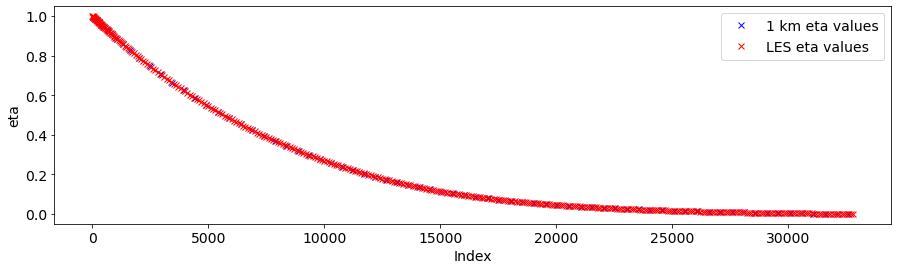

In [22]:
plt.plot(rce_profs.z.values, eta_1km, 'x', color='blue', label='1 km eta values')
plt.plot(z_les, eta_les_h, 'x', color='red', label='LES eta values')
plt.xlabel('Index')
plt.ylabel('eta')
plt.legend()

In [3]:
#del(lesinput)
lesdir = basedir + '../run/LES/RCE'
lesinput = xarray.open_dataset(lesdir+'/wrfinput_d01')
level_heights = lesinput.Z_BASE.sel(Time=0).values

In [4]:
lesinput.ZNU

<xarray.DataArray 'ZNU' (Time: 1, bottom_top: 372)>
array([[9.992000e-01, 9.984125e-01, 9.976255e-01, ..., 3.460000e-04,
        2.360000e-04, 1.260000e-04]], dtype=float32)
Dimensions without coordinates: Time, bottom_top
Attributes:
    FieldType:    104
    MemoryOrder:  Z  
    description:  eta values on half (mass) levels
    units:        
    stagger:

In [25]:
rce_q = np.interp(level_heights, rce_profs.z, rce_profs.eta_q)
rce_tk = np.interp(level_heights, rce_profs.z, rce_profs.eta_tk)

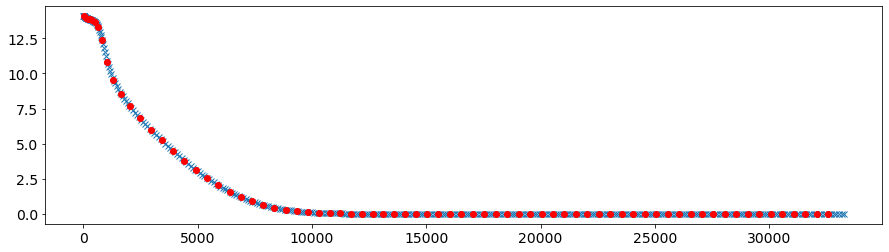

In [26]:
plt.plot(level_heights, rce_q, 'x')
plt.plot(rce_profs.z, rce_profs.eta_q, 'o', color='red')

Text(0, 0.5, 'Dist. between vertical levels [m]')

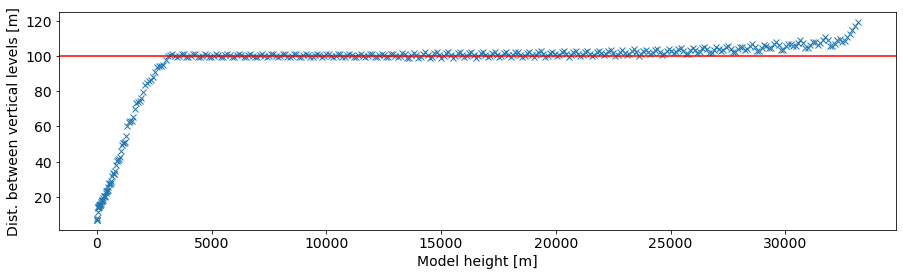

In [27]:
plt.plot(level_heights[0:len(level_heights)-1], np.diff(level_heights), 'x')
plt.axhline(100, color='red')
plt.xlabel('Model height [m]')
plt.ylabel('Dist. between vertical levels [m]')

In [28]:
len(eta_les_h)

372

In [29]:
rce_profs.eta_q.values

array([1.40669394e+01, 1.39556227e+01, 1.38989487e+01, 1.38451233e+01,
       1.37749100e+01, 1.36517391e+01, 1.33281164e+01, 1.23595400e+01,
       1.08314266e+01, 9.55448818e+00, 8.55181217e+00, 7.68214035e+00,
       6.81489706e+00, 5.97239256e+00, 5.23578119e+00, 4.48608112e+00,
       3.79043531e+00, 3.12673116e+00, 2.54619455e+00, 2.03198195e+00,
       1.58572018e+00, 1.20181715e+00, 8.84851575e-01, 6.33242249e-01,
       4.40091580e-01, 2.96872556e-01, 1.95248187e-01, 1.26216084e-01,
       8.08306038e-02, 5.10626994e-02, 3.16242054e-02, 1.91523787e-02,
       1.14852227e-02, 7.00206961e-03, 4.67103533e-03, 3.94449150e-03,
       4.08539409e-03, 3.78061249e-03, 2.60823243e-03, 1.38980232e-03,
       5.19290508e-04, 9.48672023e-05, 6.80865071e-07, 1.00167185e-07,
       1.00296745e-07, 1.00321230e-07, 1.00167163e-07, 1.00059431e-07,
       1.00007640e-07, 1.00000008e-07, 9.99999941e-08, 9.99999941e-08,
       9.99999941e-08, 9.99999941e-08, 9.99999941e-08, 9.99999941e-08,
      

In [30]:
# Interpolate q and temperature on mass points.

interp_q = sp.interpolate.interp1d(eta_1km, rce_profs.eta_q.values, fill_value='extrapolate')
rce_q = interp_q(eta_les_h)

interp_tk = sp.interpolate.interp1d(eta_1km, rce_profs.eta_tk.values, fill_value='extrapolate')
rce_tk = interp_tk(eta_les_h)

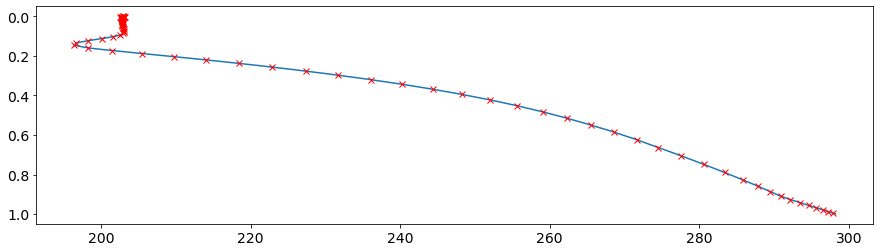

In [31]:
plt.plot(rce_tk, eta_les_h)
plt.plot(rce_profs.eta_tk.values, eta_1km, 'x', color='red')
plt.gca().invert_yaxis()

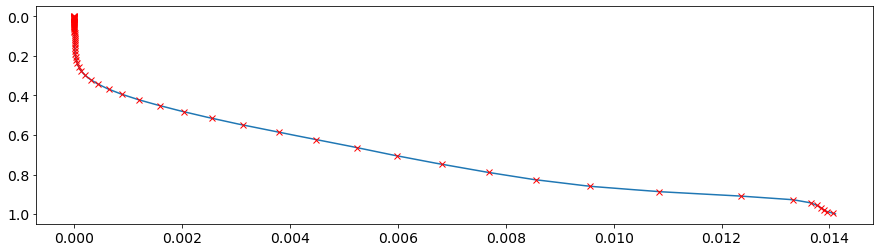

In [32]:
plt.plot(rce_q/1000, eta_les_h)
plt.plot(rce_profs.eta_q.values/1000, eta_1km, 'x', color='red')
plt.gca().invert_yaxis()

In [33]:
## Note conversion of g kg-1 to kg kg-1 for q!

import pandas as pd
pd.DataFrame.from_dict({'q': rce_q/1000}).to_csv(inputs[ds]+'/RCE_q', header=False, index=False)
pd.DataFrame.from_dict({'T': rce_tk}).to_csv(inputs[ds]+'/RCE_T', header=False, index=False)

In [28]:
inputs[ds]

'/g/data/up6/tr2908/em_quarter_ss/v4.1.4/original_1km/output/20km@1km/RCE/'